In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [26]:
# Name of the CSV file
file1 = 'Ressources/Coffee_Comsumption.csv'
file2 = "Ressources/State_Depression_Year.csv"
comsumption_df = pd.read_csv(file1)
depression_df = pd.read_csv(file2)
comsumption_df.head()


,State,Year,ALC Rate (%),Question,Cups of Coffee
0,Michigan,2011,753.0,Chronic liver disease mortality,2.52
1,Michigan,2013,429.0,Chronic liver disease mortality,2.52
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52


In [27]:
depression_df.head()

,State,Year,Depression_Percentage
0,Alabama,2011,21.2
1,Alabama,2018,24.0
2,Alabama,2017,23.8
3,Alabama,2016,22.0
4,Alabama,2015,22.1


In [28]:
#Merging Consumption dataframe and corosponding Depression percentage dataframe
merge_df = pd.merge(comsumption_df,depression_df, on=["State","Year"], how="left")
merge_df

,State,Year,ALC Rate (%),Question,Cups of Coffee,Depression_Percentage
0,Michigan,2011,753.0,Chronic liver disease mortality,2.52,20.7
1,Michigan,2013,429.0,Chronic liver disease mortality,2.52,21.3
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52,20.6
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52,19.7
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52,21.4
...,...,...,...,...,...,...
396,Mississippi,2018,0.0,Alcohol use before pregnancy,1.58,21.7
397,Mississippi,2012,6.3,Chronic liver disease mortality,1.58,18.4
398,Mississippi,2012,0.0,Chronic liver disease mortality,1.58,18.4
399,Mississippi,2019,17.5,Chronic liver disease mortality,1.58,20.6


In [29]:
#remove NAN data
merge_df = merge_df.dropna()
merge_df

,State,Year,ALC Rate (%),Question,Cups of Coffee,Depression_Percentage
0,Michigan,2011,753.0,Chronic liver disease mortality,2.52,20.7
1,Michigan,2013,429.0,Chronic liver disease mortality,2.52,21.3
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52,20.6
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52,19.7
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52,21.4
...,...,...,...,...,...,...
396,Mississippi,2018,0.0,Alcohol use before pregnancy,1.58,21.7
397,Mississippi,2012,6.3,Chronic liver disease mortality,1.58,18.4
398,Mississippi,2012,0.0,Chronic liver disease mortality,1.58,18.4
399,Mississippi,2019,17.5,Chronic liver disease mortality,1.58,20.6


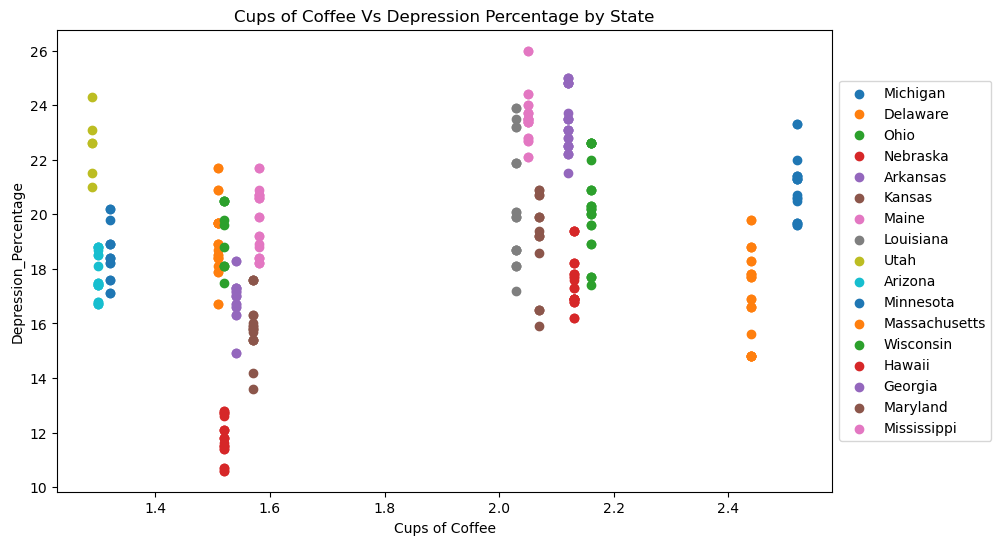

In [30]:
#Scatter plot between the Depression percentage and Cofee consumption
plt.figure(figsize=(10, 6))
for state in merge_df['State'].unique():
    subset = merge_df[merge_df['State'] == state]
    plt.scatter(subset['Cups of Coffee'], subset['Depression_Percentage'], label=state)

plt.xlabel("Cups of Coffee")
plt.ylabel("Depression_Percentage")
plt.title("Cups of Coffee Vs Depression Percentage by State")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


The correlation between cups of coffee and the depression percentage is 0.28


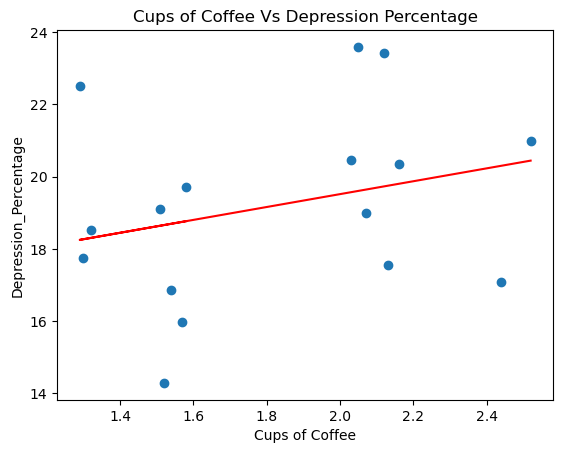

In [31]:
#To get the avg depression percentage for each cups of coffee we use groupe by 
avg_cups_df = merge_df.groupby("Cups of Coffee").mean(numeric_only=True)
plt.scatter(avg_cups_df.index, avg_cups_df["Depression_Percentage"])
correlation = st.pearsonr(avg_cups_df.index, avg_cups_df["Depression_Percentage"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_cups_df.index, avg_cups_df["Depression_Percentage"])
regress_values = merge_df["Cups of Coffee"] * slope + intercept
print("The correlation between cups of coffee and the depression percentage is {0:0.2f}".format(correlation[0]))
plt.plot(merge_df["Cups of Coffee"],regress_values,"r-")
plt.xlabel("Cups of Coffee")
plt.ylabel("Avg Depression_Percentage")
plt.title("Avg Cups of Coffee Vs Depression Percentage")
plt.show()

In [32]:
group_df

,Year,ALC Rate (%),Cups of Coffee,Depression_Percentage
Coffee_Intake_Category,,,,
Low,2015.780488,117.417073,1.305854,18.726829
Medium,2015.589744,51.900855,1.540256,16.959829
High,2015.419355,67.303226,2.187634,20.332796


In [33]:
# Use pd.cut to categorize 'Cups_of_Coffee' into bins
bins = [merge_df['Cups of Coffee'].min() - 1, 1.5, 2.0, merge_df['Cups of Coffee'].max()]
bin_labels = ['Low', 'Medium', 'High']

merge_df['Coffee_Intake_Category'] = pd.cut(merge_df['Cups of Coffee'], bins=bins, labels=bin_labels)
merge_df

/var/folders/_5/02g4lyk11dv29l6sx__ldcxw0000gn/T/ipykernel_3685/268938315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['Coffee_Intake_Category'] = pd.cut(merge_df['Cups of Coffee'], bins=bins, labels=bin_labels)


,State,Year,ALC Rate (%),Question,Cups of Coffee,Depression_Percentage,Coffee_Intake_Category
0,Michigan,2011,753.0,Chronic liver disease mortality,2.52,20.7,High
1,Michigan,2013,429.0,Chronic liver disease mortality,2.52,21.3,High
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52,20.6,High
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52,19.7,High
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52,21.4,High
...,...,...,...,...,...,...,...
396,Mississippi,2018,0.0,Alcohol use before pregnancy,1.58,21.7,Medium
397,Mississippi,2012,6.3,Chronic liver disease mortality,1.58,18.4,Medium
398,Mississippi,2012,0.0,Chronic liver disease mortality,1.58,18.4,Medium
399,Mississippi,2019,17.5,Chronic liver disease mortality,1.58,20.6,Medium


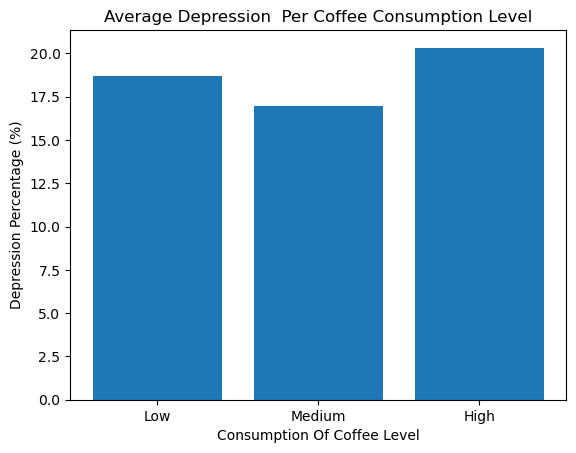

In [34]:
#to get the average depression per coffee consumption level we use  groupby 
group_df = merge_df.groupby("Coffee_Intake_Category").mean(numeric_only=True)
plt.bar(group_df.index, group_df["Depression_Percentage"])
plt.xlabel("Consumption Of Coffee Level")
plt.ylabel("Depression Percentage (%)")
plt.title("Average Depression  Per Coffee Consumption Level")

plt.show()